Training Confusion Matrix:
[[165   8]
 [  8 217]]
Training Sensitivity: 0.9644444444444444
Training Specificity: 0.953757225433526

Testing Confusion Matrix:
[[ 37   2]
 [  5 127]]
Testing Sensitivity: 0.9621212121212122
Testing Specificity: 0.9487179487179487

Training Accuracy: 0.9597989949748744
Testing Accuracy: 0.9590643274853801


Text(0.5, 1.0, 'Cost vs. Iteration')

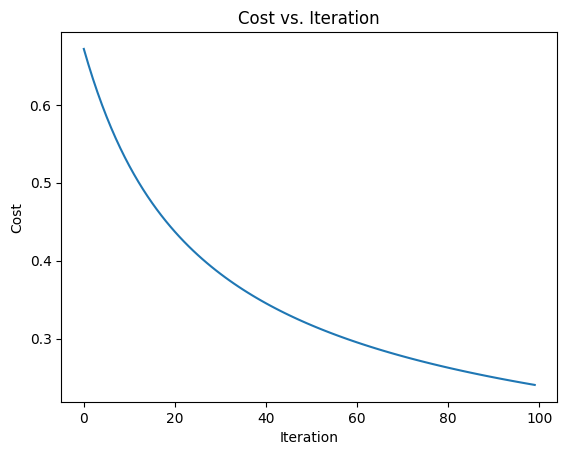

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Preprocess the data
# Normalize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Step 3: Split the dataset into training and testing sets
split_ratio = 0.7
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 4: Define logistic regression model and gradient descent algorithm
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    return sigmoid(np.dot(X, theta))

def compute_cost(X, y, theta):
    m = len(y)
    h = predict(X, theta)
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = predict(X, theta)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Step 5: Train the logistic regression model
# Add bias term to features
X_train_biased = np.c_[np.ones((len(X_train), 1)), X_train]
X_test_biased = np.c_[np.ones((len(X_test), 1)), X_test]

theta = np.zeros(X_train_biased.shape[1])
alpha = 0.01
iterations = 100
theta_trained, cost_history = gradient_descent(X_train_biased, y_train, theta, alpha, iterations)

# Step 6: Make predictions
y_train_pred = (predict(X_train_biased, theta_trained) >= 0.5).astype(int)
y_test_pred = (predict(X_test_biased, theta_trained) >= 0.5).astype(int)

# Step 7: Calculate metrics
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

def sensitivity_specificity(TP, TN, FP, FN):
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    return sensitivity, specificity

TP_train, TN_train, FP_train, FN_train = confusion_matrix(y_train, y_train_pred)
sensitivity_train, specificity_train = sensitivity_specificity(TP_train, TN_train, FP_train, FN_train)

TP_test, TN_test, FP_test, FN_test = confusion_matrix(y_test, y_test_pred)
sensitivity_test, specificity_test = sensitivity_specificity(TP_test, TN_test, FP_test, FN_test)

print("Training Confusion Matrix:")
print(np.array([[TN_train, FP_train], [FN_train, TP_train]]))
print("Training Sensitivity:", sensitivity_train)
print("Training Specificity:", specificity_train)

print("\nTesting Confusion Matrix:")
print(np.array([[TN_test, FP_test], [FN_test, TP_test]]))
print("Testing Sensitivity:", sensitivity_test)
print("Testing Specificity:", specificity_test)

# Step 8: Store training and testing accuracy for each iteration
training_accuracy = np.mean(y_train_pred == y_train)
testing_accuracy = np.mean(y_test_pred == y_test)
print("\nTraining Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

# Step 9: Plot training and testing accuracy vs. iteration number
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
